<a href="https://colab.research.google.com/github/jibintom/Deep-Learning-Codebasics/blob/main/7.%20Neural%20Network%20For%20Handwritten%20Digits%20Classification/7_Neural_Network_For_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten digits classification using neural network**

---


**In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
#sclate the data inorder to improve accuracy
x_train=x_train/255
x_test=x_test/255

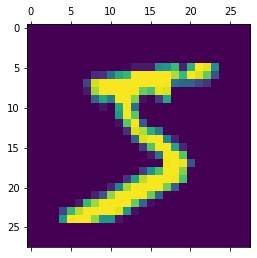

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

**Converting a 2D array into 1D array for training dataset**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train_flattened=x_train.reshape(len(x_train), 28*28)
x_train_flattened.shape

(60000, 784)

In [ ]:
x_test_flattened=x_test.reshape(len(x_test), 28*28)
x_test_flattened.shape

(10000, 784)

**Very simple neural network with no hidden layers**

---

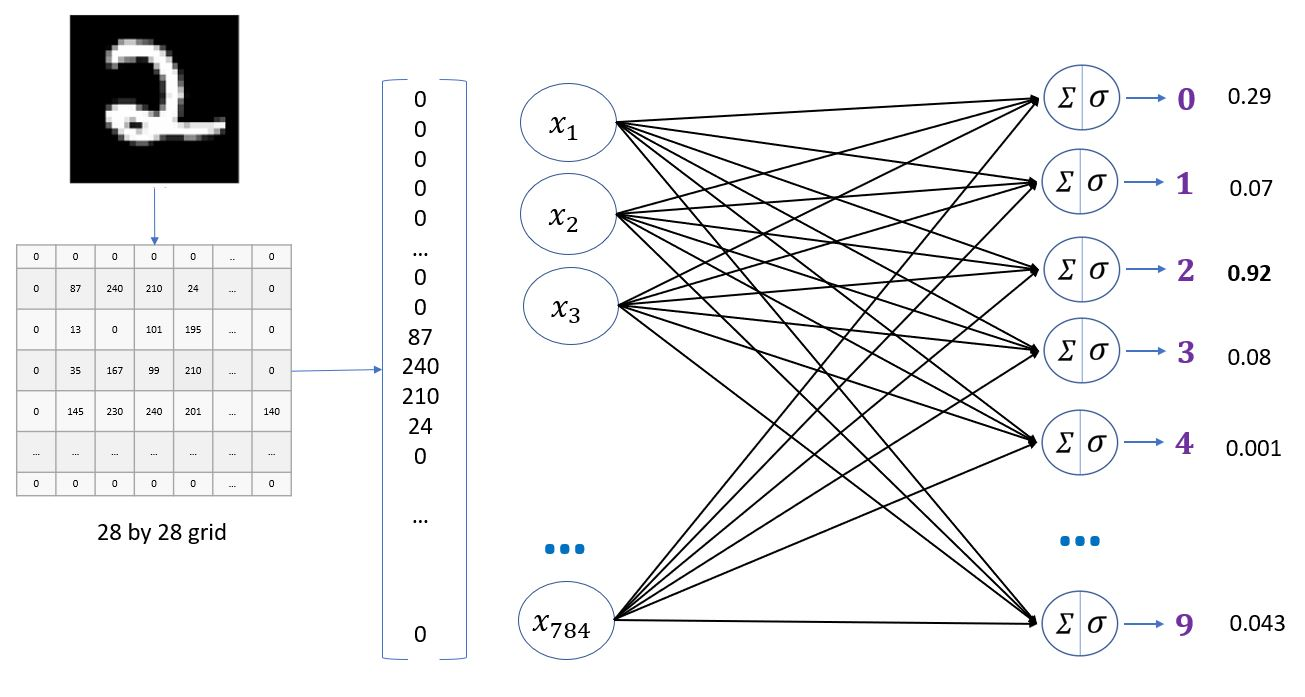


In [ ]:
model=keras.Sequential([
       keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4705 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2839 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9253


In [ ]:
#check the accuracy on test data 

model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2683 - accuracy: 0.9256


[0.26830893754959106, 0.925599992275238]

**predict some values**

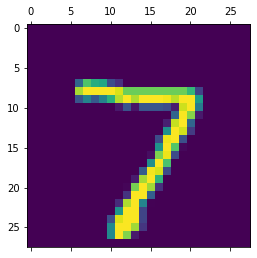

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predict=model.predict(x_test_flattened)

In [ ]:
y_predict[0]

array([2.0105034e-02, 3.2702869e-07, 3.9592654e-02, 9.5787621e-01,
       2.4042428e-03, 9.5204473e-02, 1.6355583e-06, 9.9982649e-01,
       7.8382432e-02, 6.2767214e-01], dtype=float32)

**This basically gives an array of scores for our 10 neurons and index of the maximum value in these array will be our predicted value**

**np.argmax finds a maximum element from an array and returns the index of it** 



In [ ]:
np.argmax(y_predict[0])

7

**Confusion Matrix**

---



In [ ]:
y_predict_labels=[np.argmax(i) for i in y_predict] #list comprehension
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    8,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  923,   16,    7,    5,   13,   12,   37,    4],
       [   3,    0,   18,  925,    0,   28,    2,   13,   14,    7],
       [   1,    2,    4,    1,  913,    0,   12,    6,    8,   35],
       [   9,    3,    2,   31,    8,  781,   15,    9,   28,    6],
       [  11,    3,    4,    1,    7,   12,  917,    2,    1,    0],
       [   1,    7,   21,    5,    3,    0,    0,  968,    1,   22],
       [   7,   11,    6,   28,    9,   33,    9,   15,  849,    7],
       [  11,    7,    1,   12,   27,    9,    0,   39,    2,  901]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

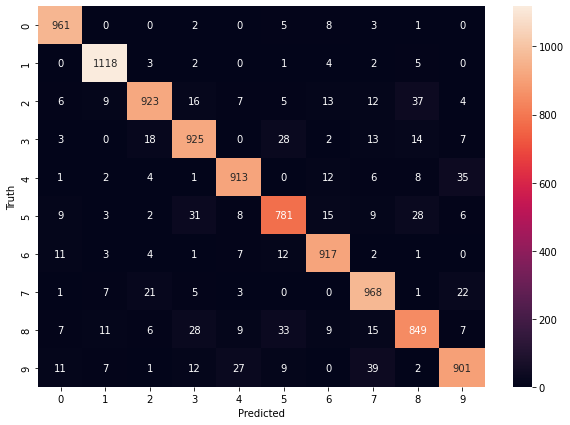

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

## **Using hidden layer**

In [ ]:
model=keras.Sequential([
       keras.layers.Dense(100, input_shape=(784,), activation="relu"),  # 100 number of neurons hidden layer required
       keras.layers.Dense(10, activation="sigmoid")                        #last layer will automatically take the input_shape from 1st layer
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2675 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1205 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9837


In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9754


[0.0791015774011612, 0.9753999710083008]

Text(69.0, 0.5, 'Truth')

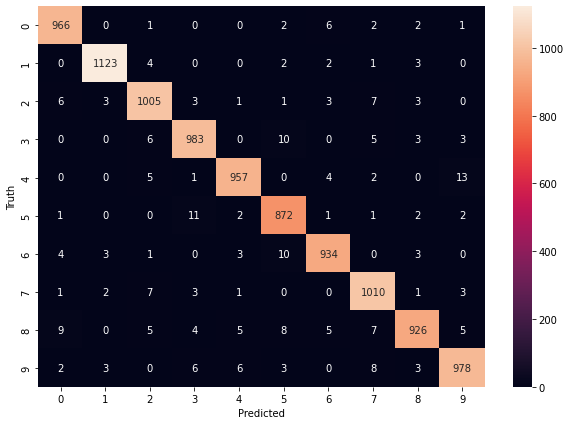

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Using Flatten layer so that we don't have to call .reshape on input dataset**

---



In [ ]:
model=keras.Sequential([
       keras.layers.Flatten(input_shape=(28, 28)),
       keras.layers.Dense(100, activation="relu"),  
       keras.layers.Dense(10, activation="sigmoid")                        
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2711 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1226 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0517 - accuracy: 0.9839


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9743


[0.08181067556142807, 0.9743000268936157]